<h1 style="text-align: center;"> Práctica series temporales </h1>
<h1 style="text-align: center; font-size: 30px"> Daily gold price </h1>
<h1 style="text-align: right; font-size: 24px; margin-right: 10px;">Guillermo Díaz Aguado</h1>

# Presentación de la serie a analizar. 
El dataset que analizaremos contiene información histórica del precio del oro en el MCX Market, proporcionando una visión detallada sobre su comportamiento diario en el intervalo de años de 2015 a 2024.

Este conjunto de datos incluye registros diarios con variables clave como:

* $\textcolor{lime}{Date}$ (Fecha): Día en que se registró el precio del oro.
* $\textcolor{lime}{Price}$ (Precio de Cierre): Último precio registrado en el día.
* $\textcolor{lime}{Open}$ (Precio de Apertura): Valor del oro al inicio de la sesión en MCX.
* $\textcolor{lime}{Low}$ (Mínimo Diario): Mayor precio alcanzado dentro de la jornada de negociación.
* $\textcolor{lime}{High}$ (Máximo Diario): Mayor precio alcanzado dentro de la jornada de negociación.
* $\textcolor{lime}{Volume}$ (Volumen de Comercio): Representa el número de unidades del activo que han sido compradas y vendidas.
* $\textcolor{lime}{Chg\%}$ (Cambio diario): Cambio porcentual con respecto al día anterior.


# 2. Representación gráfica y descomposición de la misma. 

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
pd.options.mode.use_inf_as_na = True


C:\Users\Usuario\AppData\Local\Temp\ipykernel_20784\1582673458.py:7: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


In [25]:
# dataset = pd.read_csv("/kaggle/input/daily-gold-price-20152021-time-series/Gold Price.csv")
dataset = pd.read_csv("Gold Price.csv")
dataset = pd.read_csv("Microsoft_Stock.csv")
dataset = pd.read_csv("dc.csv")
dataset.head(5)

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [28]:
dataset['Date'] = pd.to_datetime(dataset['Unnamed: 0'], format='%Y-%m-%d')
dataset.head(5)


,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume,Date
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072,2021-01-30
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827,2021-01-29
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621,2021-01-28
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911,2021-01-27
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972,2021-01-26


In [32]:
dataset.index = dataset["Date"]
dataset = dataset.drop(["Date", 'Unnamed: 0'], axis=1)



In [ ]:
dataset.sort_values("Date")
dataset.index.freq = "D"

ValueError: Inferred frequency -1D from passed values does not conform to passed frequency D

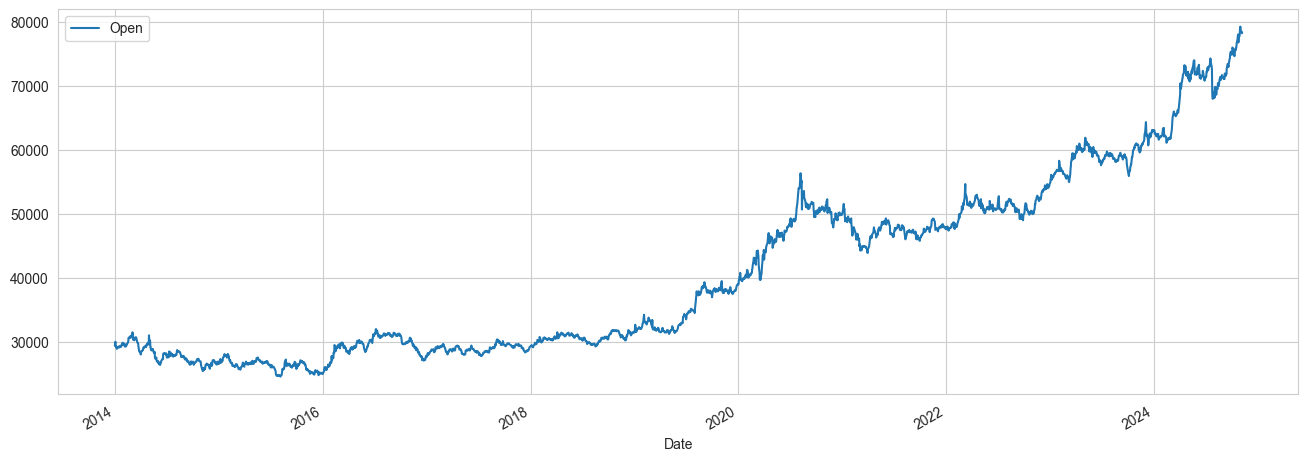

In [ ]:
["Open", "High", "Low"]
columnas_deseadas = ["Open"]
df = dataset[columnas_deseadas]


plt.figure(figsize=(16,5))
sns.lineplot(df)
plt.xticks(rotation=30, ha="right")
plt.show()


## Análisis de la tendencia.
### Media movil.

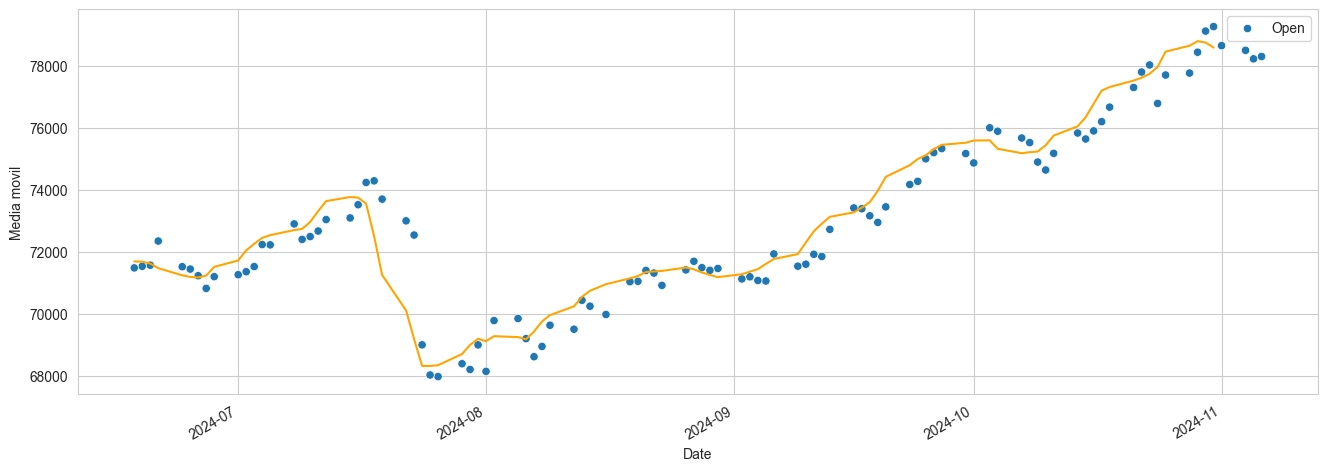

In [ ]:
df_media_movil = df.loc[:]
df_media_movil["Media movil"] = df.rolling(window=5).mean()
plt.figure(figsize=(16,5))
sns.lineplot(df_media_movil["Media movil"][:100], color="orange")
sns.scatterplot(df_media_movil[columnas_deseadas][:100])

plt.xticks(rotation=30, ha="right")
plt.show()

In [ ]:
df_serie_diferenciada = df.loc[:]
df_serie_diferenciada["Serie Diferenciada"] = df.rolling(window=5).mean()
plt.figure(figsize=(16,5))
sns.lineplot(df_media_movil["Media movil"][:100], color="orange")
sns.scatterplot(df_media_movil[columnas_deseadas][:100])

plt.xticks(rotation=30, ha="right")
plt.show()

## Descompomposición de los datos

In [ ]:
df.head(5)

In [ ]:
df.index.isna().sum()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

df.index.freq = "M"

result_sum = seasonal_decompose(df, model="add")

#result_sum.plot()

In [ ]:
#result_mult = seasonal_decompose(df, model="multiplicative")

#result_mult.plot()

# Predicción de Series temporales